<a href="https://colab.research.google.com/github/aadhamashraf/DSAI-307-Final-Project/blob/main/DSAI-307-Final-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing and Intiating Modules**

In [1]:
install.packages("colorspace")
install.packages("tidyverse")
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [2]:
library(tidyverse) # metapackage of all tidyverse packages
library(car) # for the vif function to check for multicollinearity
library(dplyr) # for data manipulation
library(ggplot2) # for data visualization
library(readr) # for data import
library(tidyr) # for data tidying

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [ ]:
# importing utilities.R
source("utilities.R")

# **Obtain the Data Set**

In [3]:
diabetes_data <- read_csv("/content/diabetes.csv")

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**Dataset Columns:**
1. Pregnancies: Number of times the patient has been pregnant.
2. Glucose: Plasma glucose concentration after a 2-hour oral glucose tolerance test.
3. BloodPressure: Diastolic blood pressure (mm Hg).
4. SkinThickness: Triceps skinfold thickness (mm).
5. Insulin: 2-hour serum insulin (mu U/ml).
6. BMI: Body mass index (weight in kg/(height in m)^2).
7. DiabetesPedigreeFunction: A function that represents the patient’s diabetes pedigree (i.e., likelihood of diabetes based on family history).
8. Age: Age of the patient (years).
9. Outcome: Binary outcome (0 or 1) where 1 indicates the presence of diabetes and 0 indicates the absence.

In [12]:
colnames(diabetes_data)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

In [10]:
diabetes_data %>%
summarise_all(funs(sum(is.na(.))))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


# **PART 1: Exploratory Analysis:**

1. The average glucose levels among patients with and without diabetes.
2. The average age of patients with and without diabetes.
3. The average blood pressure measurements across diabetic and non-diabetic groups.
4. The average BMI of diabetic versus non-diabetic patients.
5. The rate of diabetes among patients in the dataset.
6. The distribution of BMI values among all patients.
7. The distribution of Diabetes Pedigree Function (DPF) values for diabetic and non-diabetic patients.
8. The relationship between the number of pregnancies and diabetes occurrence.
9. The correlation between glucose levels and BMI.
10. The trend of glucose levels with age among diabetic and non-diabetic patients.


**The average glucose levels among patients with and without diabetes.**

In [19]:
diabetes_data %>%
  group_by(Outcome) %>%
  summarise(Average_Glucose = mean(Glucose)) %>%
  mutate(Outcome = ifelse(Outcome == 0, "Without Diabetes", "Diabetes"))

Outcome,Average_Glucose
<chr>,<dbl>
Without Diabetes,109.9800
Diabetes,141.2575


**The average age of patients with and without diabetes.**

In [16]:
diabetes_data %>%
  group_by(Outcome) %>%
  summarise(Average_Age = floor(mean(Age))) %>%
  mutate(Outcome = ifelse(Outcome == 0, "Without Diabetes", "Diabetes"))

Outcome,mean_age
<chr>,<dbl>
Without Diabetes,31
Diabetes,37


**The average blood pressure measurements across diabetic and non-diabetic groups.**

In [18]:
diabetes_data %>%
  group_by(Outcome) %>%
  summarise(Average_Blood_Pressure = mean(BloodPressure)) %>%
  mutate(Outcome = ifelse(Outcome == 0, "Without Diabetes", "Diabetes"))

Outcome,mean_blood_pressure
<chr>,<dbl>
Without Diabetes,68.18400
Diabetes,70.82463


**The average BMI of diabetic versus non-diabetic patients.**

In [ ]:
diabetes_data %>%
  group_by(Outcome) %>%
  summarise(Average_BMI = mean(BMI)) %>%
  mutate(Outcome = ifelse(Outcome == 0, "Without Diabetes", "Diabetes"))

**The rate of diabetes among patients in the dataset.**

In [21]:
diabetes_rate <- diabetes_data %>%
  summarise(Diabetes_Rate = mean(Outcome) * 100)
diabetes_rate

Diabetes_Rate
<dbl>
34.89583


**The distribution of BMI values among all patients.**

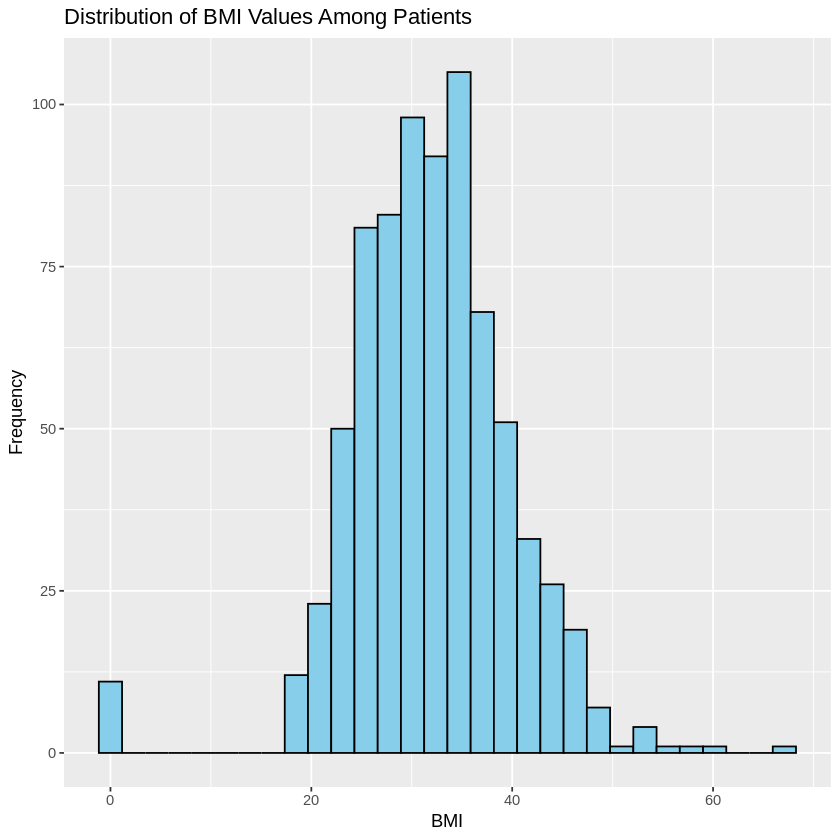

In [36]:
ggplot(diabetes_data, aes(x = BMI)) +
  geom_histogram(bins = 30, fill = "#A4A4A4", color = "darkred") +
  labs(title = "Distribution of BMI Values", x = "BMI", y = "Frequency") +
  theme(plot.title = element_text(hjust = 0.5),axis.title.x = element_text(hjust = 0.5), axis.title.y = element_text(hjust = 0.5))

**The distribution of Diabetes Pedigree Function (DPF) values for diabetic and non-diabetic patients.**

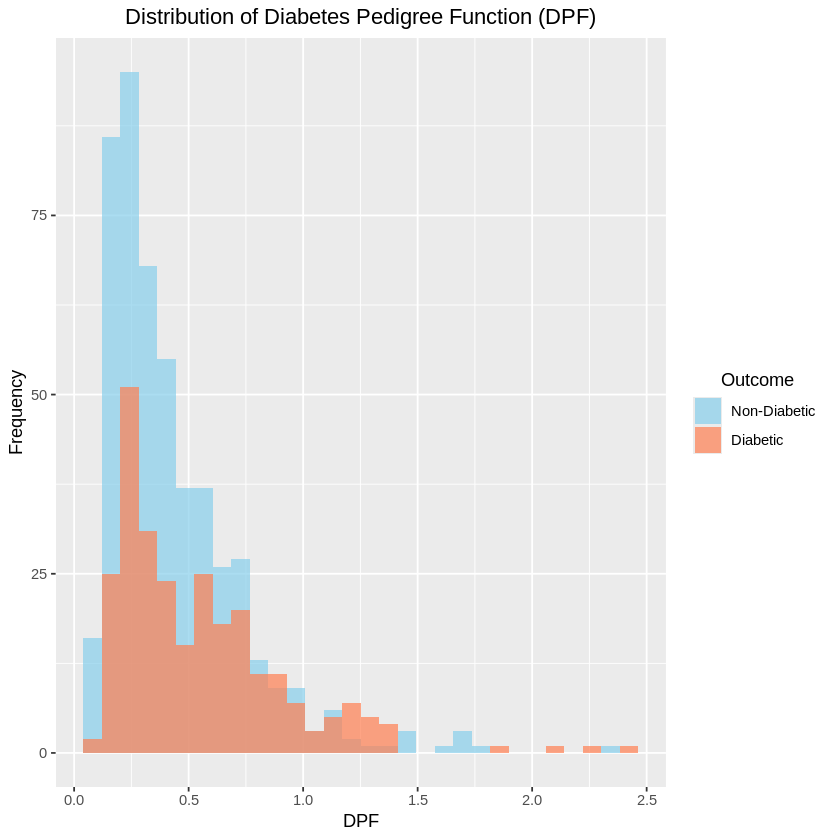

In [40]:
ggplot(diabetes_data, aes(x = DiabetesPedigreeFunction, fill = as.factor(Outcome))) +
  geom_histogram(bins = 30, , alpha = 0.7 ,position = "identity") +
  labs(title = "Distribution of Diabetes Pedigree Function (DPF)", x = "DPF", y = "Frequency", fill = "Outcome") +
  scale_fill_manual(values = c("0" = "skyblue", "1" = "coral"), labels = c("Non-Diabetic", "Diabetic")) +
  theme(plot.title = element_text(hjust = 0.5),axis.title.x = element_text(hjust = 0.5),axis.title.y = element_text(hjust = 0.5),legend.title = element_text(hjust = 0.5))

**The relationship between the number of pregnancies and diabetes occurrence.**

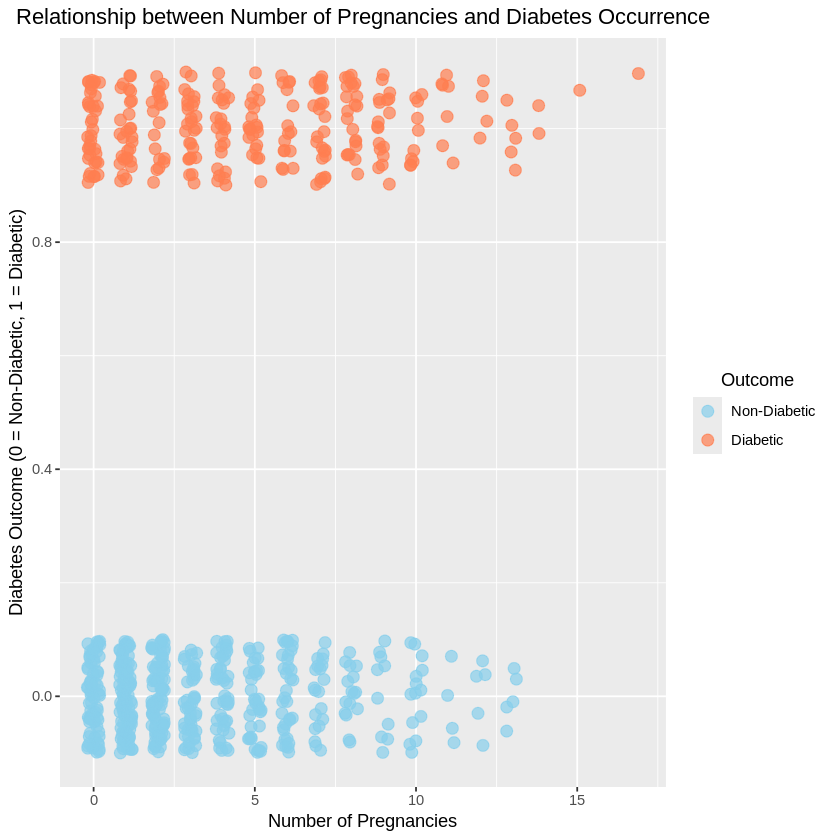

In [45]:
ggplot(diabetes_data, aes(x = Pregnancies, y = Outcome, color = as.factor(Outcome))) +
  geom_jitter(alpha = 0.7, size = 3, width = 0.2, height = 0.1) +
  labs(
    title = "Relationship between Number of Pregnancies and Diabetes Occurrence",
    x = "Number of Pregnancies",
    y = "Diabetes Outcome (0 = Non-Diabetic, 1 = Diabetic)",
    color = "Outcome"
  ) +
  scale_color_manual(
    values = c("0" = "skyblue", "1" = "coral"),
    labels = c("Non-Diabetic", "Diabetic")
  ) +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.title.x = element_text(hjust = 0.5),
    axis.title.y = element_text(hjust = 0.5),
    legend.title = element_text(hjust = 0.5)
  )


**The correlation between glucose levels and BMI.**

In [47]:
correlation_glucose_bmi <- cor(diabetes_data$Glucose, diabetes_data$BMI)
print(paste("Correlation between glucose levels and BMI:", correlation_glucose_bmi))

[1] "Correlation between glucose levels and BMI: 0.221071069458983"


**The trend of glucose levels with age among diabetic and non-diabetic patients**

`geom_smooth()` using formula = 'y ~ x'


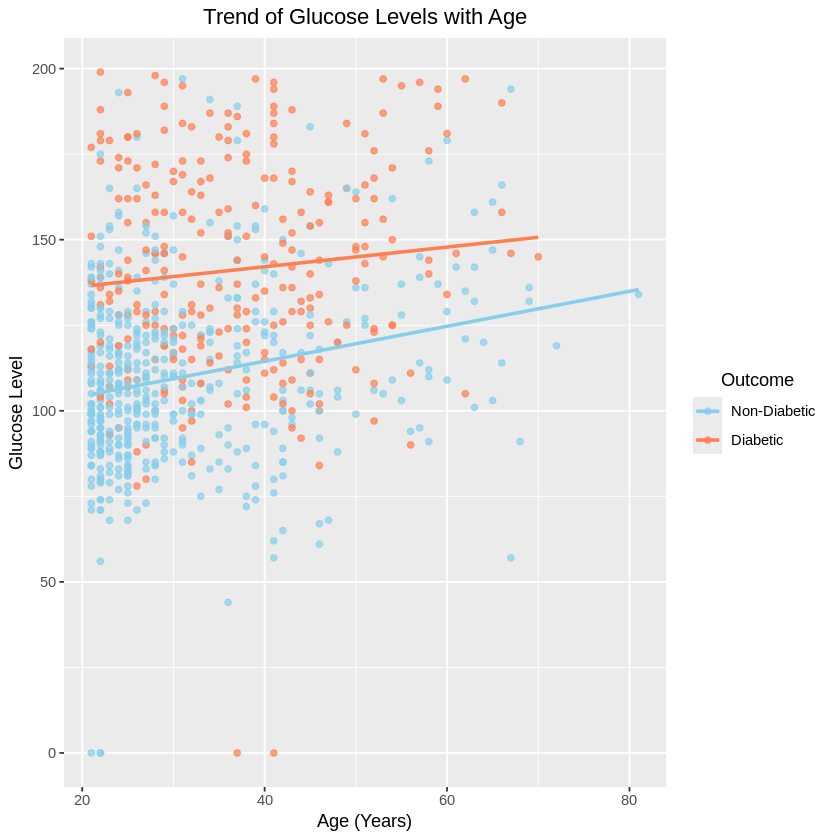

In [49]:
ggplot(diabetes_data, aes(x = Age, y = Glucose, color = as.factor(Outcome))) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Trend of Glucose Levels with Age",x = "Age (Years)",y = "Glucose Level",color = "Outcome") +
    scale_color_manual(values = c("0" = "skyblue", "1" = "coral"),labels = c("Non-Diabetic", "Diabetic")) +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.title.x = element_text(hjust = 0.5),
    axis.title.y = element_text(hjust = 0.5),
    legend.title = element_text(hjust = 0.5)
  )

# **PART 2: Answering Questions:**

## **2.1 Write down the answers to those analytical questions.**

1. Are higher glucose levels associated with a greater likelihood of diabetes?

2. Are patients with high glucose concentrations also likely to have higher BMI values?

3. Are patients with a higher number of pregnancies at greater risk of developing diabetes?

4. Are older patients more likely to have higher insulin concentrations and blood glucose levels?

5. Can you identify common “risk profiles” for diabetic patients based on key metrics (glucose, BMI, age, etc.)?


## **2 .2 Come up with 5 more bivariate/multivariate analysis questions and similarly answer each with appropriate visuals and commentary.**

# **PART 3: Hypothesis Testing:**

## **3.1 Formulate a hypothesis test to assess the validity of this claim given the available data:**
1. State the test you will use and justify your choice.
2. Clearly state the hypotheses.
3. Conduct the test and report the result.
4. Make a conclusion as to the validity of the claim, assume a significance level of 0.05.


### **3.1**
**Claim + Hypothesis**:
Patients with BMI over 30 have higher glucose levels than those with a BMI under 30.

**Justification**:
- using independent t-test to compare the mean glucose levels between two BMI groups ("Obese", "non-Obese").
- since the depenent variable **Glucose** is continous and the independent variable **BMI** is categorical, the t-test is an appropriate test to use.

In [ ]:
# Read and preprocess data
diabetes_data3 <- read_csv("diabetes.csv") %>%
  mutate(across(everything(), as.numeric)) %>%
  mutate(bmi_group = ifelse(BMI > 30, "Obese", "Non-obese"),
         diabetes_status = ifelse(Outcome == 1, "Diabetic", "Non-diabetic"))

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
diabetes_data3

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi_group,diabetes_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
6,148,72,35,0,33.6,0.627,50,1,Obese,Diabetic
1,85,66,29,0,26.6,0.351,31,0,Non-obese,Non-diabetic
8,183,64,0,0,23.3,0.672,32,1,Non-obese,Diabetic
1,89,66,23,94,28.1,0.167,21,0,Non-obese,Non-diabetic
0,137,40,35,168,43.1,2.288,33,1,Obese,Diabetic
5,116,74,0,0,25.6,0.201,30,0,Non-obese,Non-diabetic
3,78,50,32,88,31.0,0.248,26,1,Obese,Diabetic
10,115,0,0,0,35.3,0.134,29,0,Obese,Non-diabetic
2,197,70,45,543,30.5,0.158,53,1,Obese,Diabetic


In [ ]:
bmi_glucose_box <- create_boxplot(
  diabetes_data3,
  "bmi_group",
  "Glucose",
  "Glucose Levels by BMI Group"
) # Boxplot of Glucose levels by BMI group for normality check
qq_plot <- create_qq_plot(
  diabetes_data3, "Glucose", "bmi_group"
) # QQ plot of Glucose levels by BMI group for varicance check

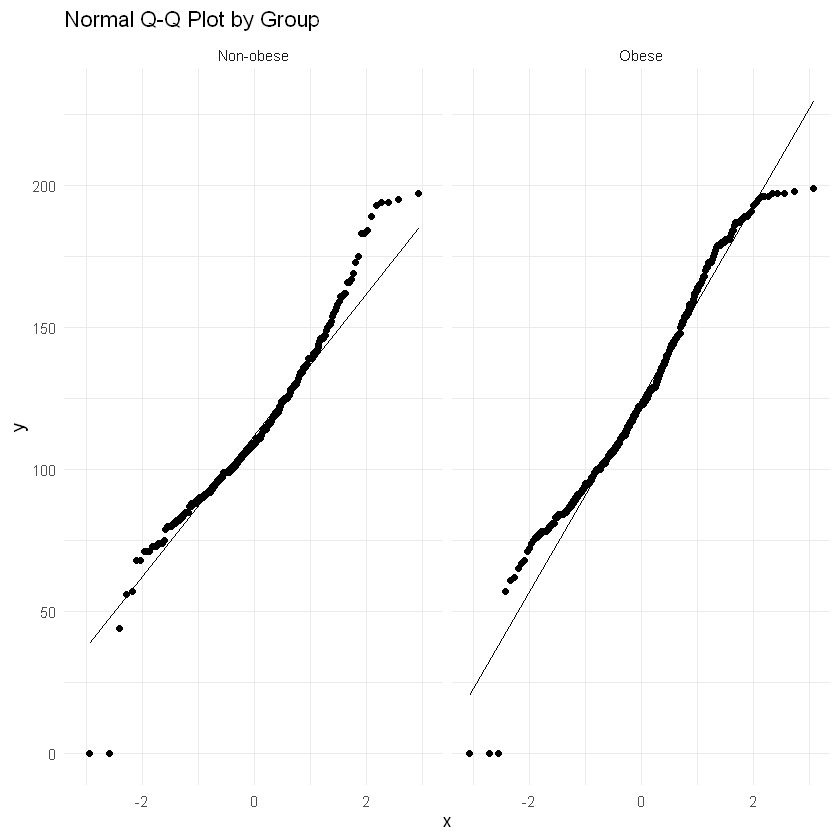

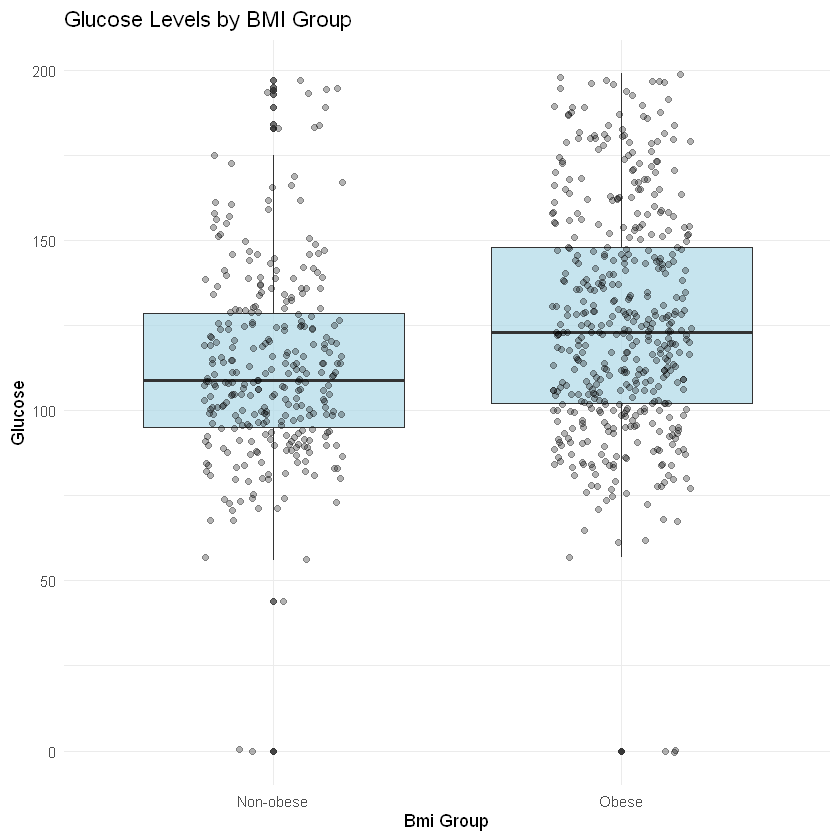

In [ ]:
qq_plot

bmi_glucose_box

### **Stating Hypothesis**

**Null Hypothesis**: H<sub>0</sub>: μ<sub>*obese*</sub> = μ<sub>*non-obese*</sub> --> (There is no difference in glucose levels between patients with BMI over 30 and those with BMI under 30).

**Alternative Hypothesis**: H<sub>1</sub>: μ<sub>*obese*</sub> > μ<sub>*non-obese*</sub> --> (Patients with BMI over 30 have higher glucose levels than those with a BMI under 30).

In [ ]:
t_test_result <- t.test(Glucose ~ bmi_group, data = diabetes_data3)

## **3.2 Come up with your own claim from the available data and conduct a hypothesis test for it following in the same steps.**


### **3.2**
**Claim + Hypothesis**: patients with high blood pressure are diabetic.

**Justification**:
- using t-test to assess the association between continuous variable **BloodPressure** and categorical variable **Outcome**.
- since the dependent variable **BloodPressure** is continuous and the independent variable **Outcome** is categorical, the t-test is an appropriate test to use.

In [ ]:
bp_test_data <- diabetes_data3 %>%
  mutate(diabetes_status = ifelse(Outcome == 1, "Diabetic", "Non-diabetic"))

In [ ]:
bp_box <- create_boxplot(
  bp_test_data,
  "diabetes_status",
  "BloodPressure",
  "Blood Pressure by Diabetes Status"
) # Boxplot of Blood Pressure by Diabetes Status for normality check
bp_qq <- create_qq_plot(
  bp_test_data, "BloodPressure", "diabetes_status"
) # QQ plot of Blood Pressure by Diabetes Status for variance check

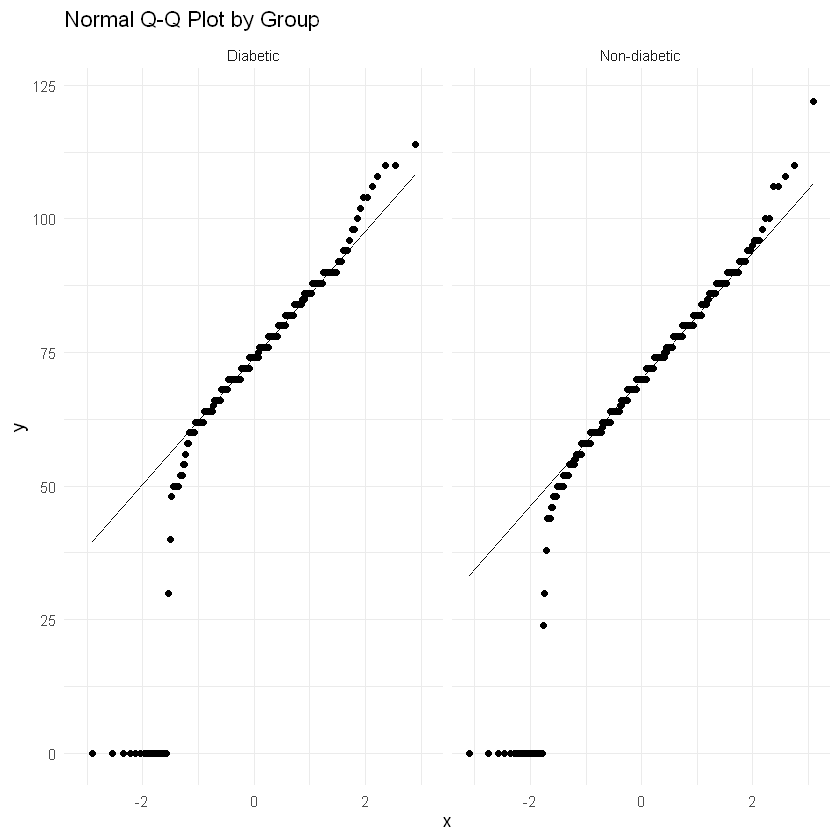

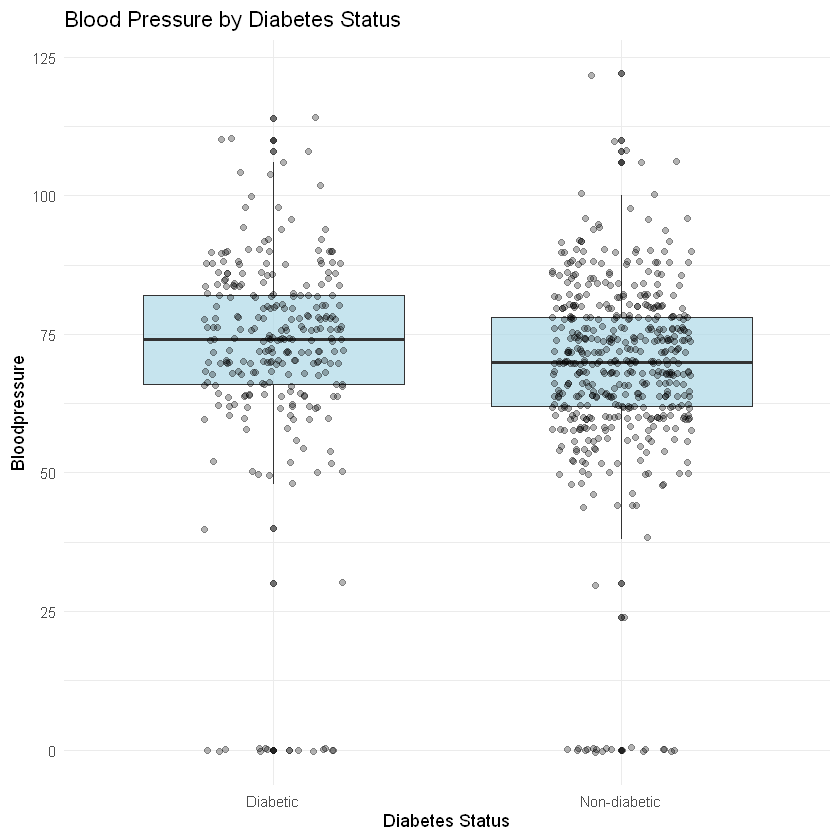

In [ ]:
bp_qq

bp_box

### **Stating Hypothesis**

**Null Hypothesis**: H<sub>0</sub>: μ<sub>*diabetic*</sub> = μ<sub>*non-diabetic*</sub> --> (There is no difference in blood pressure between diabetic and non-diabetic patients).

**Alternative Hypothesis**: H<sub>1</sub>: μ<sub>*diabetic*</sub> > μ<sub>*non-diabetic*</sub> --> (Patients with high blood pressure are diabetic).

In [ ]:
bp_t_test <- t.test(BloodPressure ~ diabetes_status, data = bp_test_data)

## **Reporting results of **3.1** and **3.2** hypothesis tests.**

In [ ]:
print_results(t_test_result = t_test_result, bp_t_test = bp_t_test)


=== BMI and Glucose Level Analysis ===

	Welch Two Sample t-test

data:  Glucose by bmi_group
t = -5.8895, df = 716.63, p-value = 5.955e-09
alternative hypothesis: true difference in means between group Non-obese and group Obese is not equal to 0
95 percent confidence interval:
 -17.537835  -8.768521
sample estimates:
mean in group Non-obese     mean in group Obese 
               112.9307                126.0839 


=== Blood Pressure and Diabetes Status Analysis ===

	Welch Two Sample t-test

data:  BloodPressure by diabetes_status
t = 1.7131, df = 471.31, p-value = 0.08735
alternative hypothesis: true difference in means between group Diabetic and group Non-diabetic is not equal to 0
95 percent confidence interval:
 -0.388326  5.669580
sample estimates:
    mean in group Diabetic mean in group Non-diabetic 
                  70.82463                   68.18400 



In [ ]:
# interpretation for BMI-Glucose test
bmi_glucose_interpretation <- interpret_hypothesis_test(t_test_result)

# interpretation for Blood Pressure-Diabetes test
bp_diabetes_interpretation <- interpret_hypothesis_test(bp_t_test)

In [ ]:
create_report(
  bmi_glucose_interpretation = bmi_glucose_interpretation,
  bp_diabetes_interpretation = bp_diabetes_interpretation
)


=== Hypothesis Testing Results ===

1. BMI and Glucose Levels:
   -  Reject the null hypothesis 
   - P-value: 5.9554e-09 
   - 95% CI: -17.54 to -8.77 

2. Blood Pressure and Diabetes Status:
   -  Fail to reject the null hypothesis 
   - P-value: 0.087354 
   - 95% CI: -0.39 to 5.67 


# **PART 4: Simulation Task:**

## **4.1 Take 25 Random Samples of Size 15 from the Dataset**

1. Select a relevant column from the dataset (e.g., Glucose, BMI, or Age).
2. Generate 25 random samples, each containing 15 data points, from the selected column.
3. For each sample, compute the mean and then calculate the 95% confidence interval for the sample mean.
4. From your output, determine the proportion of these 25 confidence intervals that contain the true population mean of the selected column (e.g., mean glucose or BMI).


## 4.2 **Increase the Sample Size to 100**
1. Now, take 25 random samples, each with a sample size of 100, from the same column you selected in part (a)..
2. For each sample, compute the mean and calculate the 95% confidence intervals.
3. Observe the following:
    * Does the width of the confidence intervals increase or decrease?
    * Does increasing the sample size result in more or fewer intervals containing the true population mean?
4. Compare your findings with actual computations and interpret the results.


## **4.3 Take 20 Random Samples of Size 10 from the Dataset**
1. Finally, generate 20 random samples, each with a sample size of 10, from the same selected column in the dataset.
2. For each sample, compute the mean and determine the 95% confidence intervals.
3. Evaluate the coverage proportion and analyze the relationship between sample size and the accuracy of confidence intervals.
